In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [3]:
df = pd.read_csv('Churn_Modelling.csv')
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [4]:
df.shape

(10000, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df.duplicated().sum()

0

In [8]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [9]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [10]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [12]:
df.drop(columns=['RowNumber' ,'CustomerId','Surname'], inplace=True)

In [13]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [24]:
df = pd.get_dummies(df,columns=['Geography' , 'Gender'] ,drop_first=True)

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [26]:
x = df.drop(columns='Exited')
y = df['Exited']

In [27]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2 , random_state=42)

In [28]:
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [29]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [30]:
x_train.shape

(8000, 11)

In [31]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [32]:
x_train_scaled

array([[ 0.35649971, -0.6557859 ,  0.34567966, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-0.20389777,  0.29493847, -0.3483691 , ...,  1.72572313,
        -0.57638802,  0.91324755],
       [-0.96147213, -1.41636539, -0.69539349, ..., -0.57946723,
         1.73494238,  0.91324755],
       ...,
       [ 0.86500853, -0.08535128, -1.38944225, ..., -0.57946723,
        -0.57638802, -1.09499335],
       [ 0.15932282,  0.3900109 ,  1.03972843, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [ 0.47065475,  1.15059039, -1.38944225, ...,  1.72572313,
        -0.57638802,  0.91324755]])

In [33]:
x_test_scaled

array([[-5.12501721e-01, -6.77299309e-01, -6.98445493e-01, ...,
         1.73668197e+00, -5.63491843e-01,  9.09111664e-01],
       [-2.36046598e-01,  3.84298354e-01, -1.38035469e+00, ...,
        -5.75810666e-01, -5.63491843e-01,  9.09111664e-01],
       [-4.61306328e-01,  4.80807232e-01, -3.57490896e-01, ...,
        -5.75810666e-01,  1.77464858e+00, -1.09997489e+00],
       ...,
       [ 8.59534812e-01,  7.70333868e-01,  6.65372897e-01, ...,
        -5.75810666e-01, -5.63491843e-01, -1.09997489e+00],
       [ 4.70449825e-01, -9.66825944e-01, -3.57490896e-01, ...,
        -5.75810666e-01, -5.63491843e-01,  9.09111664e-01],
       [-1.84851205e-01, -1.73715981e-03, -1.38035469e+00, ...,
         1.73668197e+00, -5.63491843e-01,  9.09111664e-01]])

In [34]:
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [66]:
model = Sequential()

model.add(Dense(10 , activation='sigmoid' , input_dim=11))
model.add(Dense(1 , activation='sigmoid'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                120       
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 131 (524.00 Byte)
Trainable params: 131 (524.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [67]:
model.compile(optimizer = 'Adam' , loss='binary_crossentropy' , metrics=['accuracy'])

In [81]:
history = model.fit(x_train_scaled , y_train , epochs=30, validation_split=0.2)

Epoch 1/30
200/200 [==============================] - 1s 5ms/step - loss: 0.3545 - accuracy: 0.8580 - val_loss: 0.3521 - val_accuracy: 0.8569
Epoch 2/30
200/200 [==============================] - 1s 4ms/step - loss: 0.3539 - accuracy: 0.8581 - val_loss: 0.3515 - val_accuracy: 0.8562
Epoch 3/30
200/200 [==============================] - 1s 5ms/step - loss: 0.3533 - accuracy: 0.8567 - val_loss: 0.3514 - val_accuracy: 0.8587
Epoch 4/30
200/200 [==============================] - 1s 4ms/step - loss: 0.3527 - accuracy: 0.8575 - val_loss: 0.3505 - val_accuracy: 0.8537
Epoch 5/30
200/200 [==============================] - 1s 5ms/step - loss: 0.3521 - accuracy: 0.8586 - val_loss: 0.3502 - val_accuracy: 0.8562
Epoch 6/30
200/200 [==============================] - 1s 5ms/step - loss: 0.3515 - accuracy: 0.8580 - val_loss: 0.3496 - val_accuracy: 0.8537
Epoch 7/30
200/200 [==============================] - 1s 5ms/step - loss: 0.3510 - accuracy: 0.8595 - val_loss: 0.3498 - val_accuracy: 0.8562
Epoch 

In [82]:
model.layers[0].get_weights()

[array([[-3.96070927e-01,  2.82123778e-02,  1.10646524e-02,
         -4.84200299e-01, -1.45406649e-01, -1.38919801e-01,
          2.02304065e-01,  5.14856130e-02, -4.60939556e-01,
         -1.14409011e-02],
        [ 3.09926495e-02, -2.00935268e+00,  4.07628477e-01,
          9.11498219e-02, -1.84868097e-01, -2.84352279e+00,
         -8.74561549e-04, -8.12696278e-01,  2.74419475e+00,
          3.88715744e-01],
        [-1.96784928e-01,  1.83445558e-01,  2.67237108e-02,
         -1.25899702e-01, -3.36657767e-03,  4.91396300e-02,
          1.34609789e-01, -4.62724343e-02,  5.01709223e-01,
          2.08745897e-02],
        [ 2.29006648e+00,  3.86361986e-01, -7.44437695e-01,
         -3.39528620e-01, -1.28047788e+00, -4.22352925e-03,
          4.72654402e-01, -6.99044585e-01, -1.49476454e-01,
         -8.08205247e-01],
        [ 2.03173947e+00, -4.66216058e-01, -1.33231986e+00,
         -1.02662730e+00,  1.01463652e+00, -2.31199741e-01,
         -7.36839831e-01, -4.46491289e+00,  9.459402

In [83]:
y_log = model.predict(x_test_scaled)

63/63 [==============================] - 0s 3ms/step


In [84]:
y_pred = np.where(y_log>0.5 , 1,0)

In [85]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test , y_pred)

0.863

In [86]:
import matplotlib.pyplot as plt

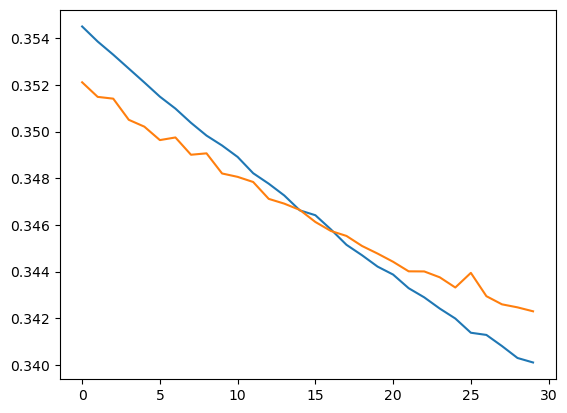

In [89]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])